In [1]:
import numpy as np
import os
import wandb
import matplotlib.pyplot as plt
import tensorflow as tf
from gpflow.config import default_float
from gpflow.likelihoods import Gaussian

from docs.sde.sde_exp_utils import generate_dw_data
from markovflow.sde.sde import DoubleWellSDE, PriorDoubleWellSDE
from markovflow.models.vi_sde import VariationalMarkovGP
from markovflow.models.cvi_sde import SDESSM
from markovflow.sde.sde_utils import KL_sde

from IPython.display import clear_output


2022-07-14 16:27:39.718131: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-14 16:27:39.718163: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-14 16:27:41.807826: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-14 16:27:41.808969: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-07-14 16:27:41.839848: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-14 16:27:41.840231: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties

In [2]:
os.environ['WANDB_MODE'] = 'offline'
wandb.init()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


In [3]:
# Set seed
tf.random.set_seed(12)
np.random.seed(12)

In [4]:
DTYPE = default_float()
q = 1.  # Set this to one so that later calculations become convenient while testing
x0 = 1.
t0 = 0.
t1 = 20.
dt = 0.01
noise_var = 0.01

In [5]:
obs_vals, obs_grid, latent_process, time_grid, _, _, _ = generate_dw_data(q=q, x0=x0, t0=t0, t1=t1,
                                                                            simulation_dt=dt,
                                                                            noise_stddev=np.sqrt(noise_var),
                                                                            n_observations=20,
                                                                            dtype=DTYPE)

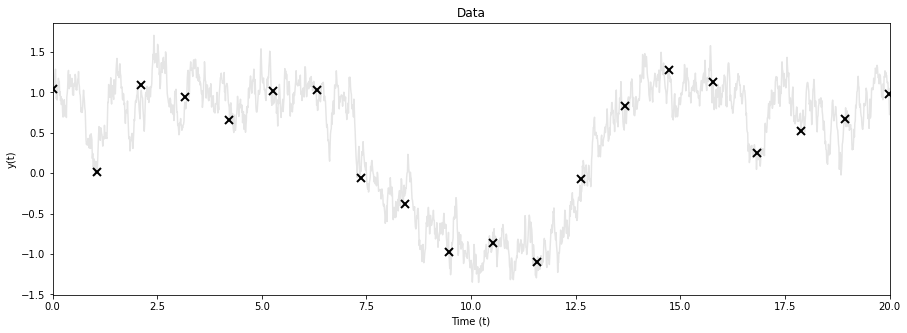

In [6]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.plot(time_grid, tf.reshape(latent_process, (-1)), label="Latent Process", alpha=0.2, color="gray")
plt.plot(obs_grid.numpy().reshape(-1), obs_vals.numpy().reshape(-1), 'kx', ms=8, mew=2, label="Observations (Y)")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.xlim([t0, t1])
plt.title("Data")
plt.show()

In [7]:
# Prior SDE
true_q = q * tf.ones((1, 1), dtype=DTYPE)
prior_sde = PriorDoubleWellSDE(q=true_q, initial_a_val=4., initial_c_val=1.)

# likelihood
likelihood = Gaussian(noise_var)

obs_data = (obs_grid, tf.squeeze(obs_vals, axis=0))

In [8]:
ssm_model = SDESSM(input_data=obs_data, prior_sde=prior_sde, grid=time_grid, likelihood=likelihood, learning_rate=.9)
# Set initial statistics and posterior path
ssm_model.initial_mean = 1. + 0. * ssm_model.initial_mean
ssm_model.initial_chol_cov = .1 + 0. * ssm_model.initial_chol_cov

ssm_model.run()

2022-07-14 16:27:50.887889: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


SSM: Starting ELBO -734.9032549349035;
SSM: ELBO -162.54336336473466!!!
SSM: ELBO -160.69069745878397!!!
SSM: ELBO -160.5396120675837!!!
SSM: ELBO -160.5248041240814!!!
SSM: ELBO -160.5233262988394!!!
SSM: ELBO -160.5231785459702!!!
SSM: Sites Converged!!!
SSM: ELBO -382.40645239432126!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -44.92396106045402!!!
SSM: Sites Converged!!!
SSM: ELBO -58.39111778833606!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -32.43592030271776!!!
SSM: Sites Converged!!!
SSM: ELBO -49.86660012555596!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -48.667350834420006!!!
SSM: Sites Converged!!!
SSM: ELBO -30.652019328005288!!!
SSM: Sites Converged!!!
SSM: ELBO -37.1065864137752!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -38.05970903730864!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -27.701119292266547!!!
SSM: Sites Converge

SSM: ELBO -49.573942071362076!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -28.189905426015596!!!
SSM: Sites Converged!!!
SSM: ELBO -31.28786013376043!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -60.06496717135349!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -35.08726667870646!!!
SSM: Sites Converged!!!
SSM: ELBO -28.195479498577296!!!
SSM: Sites Converged!!!
SSM: ELBO -33.79597171574064!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -44.76947244556488!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -28.25672860095822!!!
SSM: Sites Converged!!!
SSM: ELBO -31.01909844052753!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -71.77475565934563!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -30.184896622793293!!!
SSM: Sites Converged!!!
SSM: ELBO -27.559738228603656!!!
SSM: Sites Converged!!!
SSM: ELB

SSM: ELBO -32.3735259399629!!!
SSM: Sites Converged!!!
SSM: ELBO -30.19898904841964!!!
SSM: Sites Converged!!!
SSM: ELBO -30.235654261977793!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -61.0794126580182!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -29.065758714521113!!!
SSM: Sites Converged!!!
SSM: ELBO -29.12235315567648!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -53.59191691523728!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -30.78345443461276!!!
SSM: Sites Converged!!!
SSM: ELBO -28.856385710610706!!!
SSM: Sites Converged!!!
SSM: ELBO -32.739931285057736!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -45.96039702585215!!!
SSM: ELBO decreasing! Decaying LR!!!
SSM: Sites Converged!!!
SSM: ELBO -29.01985478303517!!!
SSM: Sites Converged!!!
SSM: ELBO -28.5526643717353!!!
SSM: Sites Converged!!!
SSM: ELBO -64.7147401360108!!!
SSM: ELBO decreasi

KeyboardInterrupt: 

In [ ]:
m_ssm, S_ssm = ssm_model.dist_q.marginals
S_ssm = tf.reshape(S_ssm, (-1)).numpy()

m_ssm = m_ssm.numpy().reshape(-1)
S_ssm_std = np.sqrt(S_ssm + noise_var)

In [ ]:
vgp_model = VariationalMarkovGP(input_data=obs_data,
                                    prior_sde=prior_sde, grid=time_grid, likelihood=likelihood,
                                    lr=.5, initial_state_lr=.001)

vgp_model.q_initial_cov = tf.reshape(ssm_model.fx_covs, (-1))[0] + 0. * vgp_model.q_initial_cov
vgp_model.q_initial_mean = tf.reshape(ssm_model.fx_mus, (-1))[0] + 0. * vgp_model.q_initial_mean


v_gp_elbo, v_gp_prior_vals = vgp_model.run(update_prior=False)


In [ ]:
m, S = vgp_model.forward_pass
S = tf.reshape(S, (-1)).numpy()

m = m.numpy().reshape(-1)
S_std = np.sqrt(S + noise_var)

In [ ]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.plot(time_grid, tf.reshape(latent_process, (-1)), label="Latent Process", alpha=0.2, color="gray")
plt.plot(obs_grid.numpy().reshape(-1), obs_vals.numpy().reshape(-1), 'kx', ms=8, mew=2, label="Observations (Y)")

plt.plot(time_grid.numpy().reshape(-1), m.reshape(-1), linestyle='dotted')
plt.fill_between(
    time_grid,
    y1=(m.reshape(-1) - 2 * S_std.reshape(-1)).reshape(-1, ),
    y2=(m.reshape(-1) + 2 * S_std.reshape(-1)).reshape(-1, ),
    alpha=.2,
    linestyle='dashed',
    label="VGP"
)
plt.plot(time_grid.numpy().reshape(-1), m_ssm.reshape(-1), linestyle='dotted')
plt.fill_between(
    time_grid,
    y1=(m_ssm.reshape(-1) - 2 * S_ssm_std.reshape(-1)).reshape(-1, ),
    y2=(m_ssm.reshape(-1) + 2 * S_ssm_std.reshape(-1)).reshape(-1, ),
    alpha=.2,
    linestyle='dashed',
    label="SDE-SSM"
)
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.xlim([t0, t1])
plt.legend()
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [15, 5]

plt.plot(time_grid.numpy().reshape(-1), vgp_model.psi_lagrange.numpy().reshape(-1))

plt.xlabel("Time (t)")
plt.ylabel("Psi (t)")
plt.xlim([t0, t1])
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [15, 5]

plt.plot(time_grid.numpy().reshape(-1), vgp_model.lambda_lagrange.numpy().reshape(-1))

plt.xlabel("Time (t)")
plt.ylabel("lambda (t)")
plt.xlim([t0, t1])
plt.show()